In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [218]:
df = pd.read_csv('Salary Data.csv')

In [219]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [220]:
df.dropna(inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [221]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [222]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Gender'] = label_encoder.fit_transform(x['Gender'])
x['Education Level'] = label_encoder.fit_transform(x['Education Level'])
x['Job Title'] = label_encoder.fit_transform(x['Job Title'])*0.1
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,15.9,5.0
1,28.0,0,1,1.7,3.0
2,45.0,1,2,13.0,15.0
3,36.0,0,0,10.1,7.0
4,52.0,1,1,2.2,20.0
...,...,...,...,...,...
370,35.0,0,0,13.1,8.0
371,43.0,1,1,3.0,19.0
372,29.0,0,0,7.0,2.0
373,34.0,1,0,13.7,7.0


In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [224]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [225]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [226]:
y_train_pred

array([ 48065.71973406,  59855.73389653,  76290.24562911, 185139.79950229,
        89881.54955583,  57848.7738027 , 118506.88454722,  39676.2400164 ,
        46900.0317025 ,  40952.19818722, 166847.63661185,  79030.91930075,
        45791.53223441,  31695.53050885,  57745.11020893,  43421.98124918,
        51233.01109287,  48169.38332784, 167196.61391132,  42365.08189116,
       166308.95449319,  51370.65900648,  80468.36433485, 165252.28682198,
       128550.97956699, 121539.04466516, 173882.05589509, 147354.94155527,
       165804.58911069,  77043.46354196,  98315.95475345,  87932.8328223 ,
       121305.80157916, 164081.15434939,  86629.49687713, 135589.92844694,
        93406.1117442 , 163459.06547911,  84459.08027888, 190321.5919779 ,
        90017.54061146,  18986.62096798,  94255.45222785,  69716.5356605 ,
       152089.69716437, 179640.07728353, 188262.80008719,  40992.06667205,
       110428.28830326, 169859.53988763,  57745.11020893, 122503.37734861,
       152515.87512757,  

In [227]:
y_test_pred

array([ 35665.68732101,  51500.2384987 ,  42195.63391411, 151579.34030925,
        76290.24562911, 152853.2215313 ,  53999.60066296, 135830.60524828,
        46174.38654607, 170552.22287616,  59855.73389653, 111331.44985812,
       149426.77118805,  95148.66339464, 123811.87759654,  65771.76734837,
        55056.26833417,  46200.30244452, 146620.31313314, 164670.17374415,
        82581.06497123,  88554.81438495, 102826.34323462,  39883.56720395,
       176886.80559378,  42287.33419583,  53700.5731937 ,  69612.87206672,
       119998.0433449 ,  52475.09225149,  62337.24858373, 102636.86352413,
       116253.06119735, 129418.1675277 ,  54615.69806062, 102248.12504747,
        68290.13909415, 105278.40319871, 101197.64383096,  99656.53520308,
       124155.69059324, 161379.71445653, 133797.09454997, 159370.23768997,
       162986.16774372,  49666.62127259,  58085.91177937, 139360.61187768,
        61871.28981016,  93320.59791718,  87575.89440907,  89240.59105655,
        77554.24048786,  

In [228]:
from sklearn.metrics import r2_score


r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

print('R2 of train = ', r2_score_train)
print('R2 of test = ', r2_score_test)

R2 of train =  0.8970064362242435
R2 of test =  0.9169805443702949


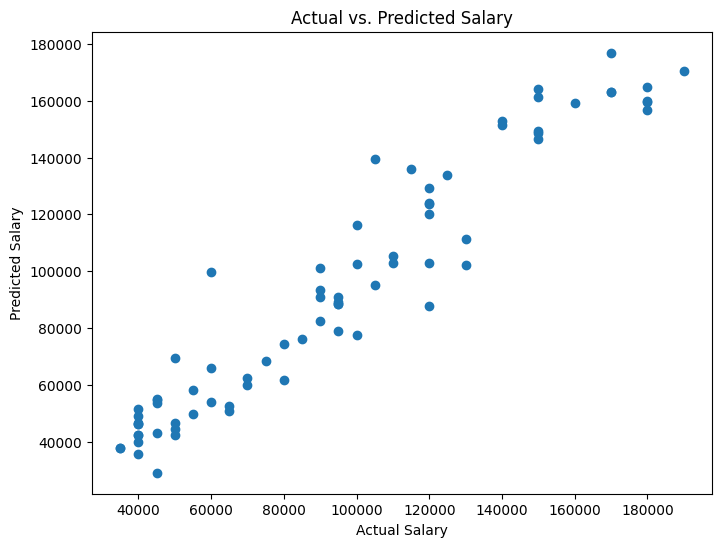

In [229]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

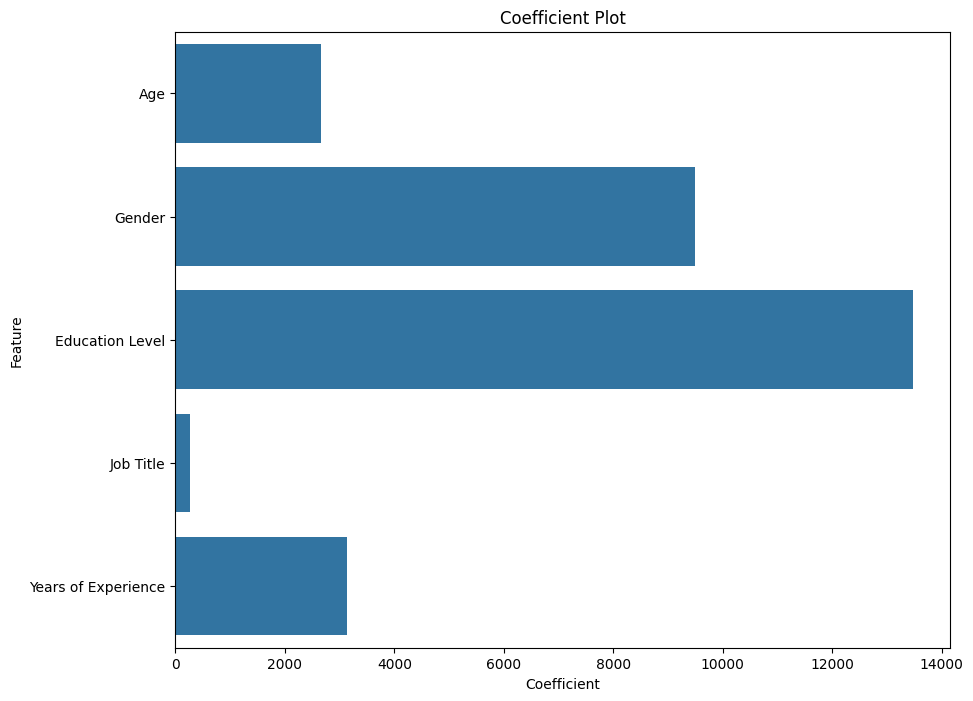

In [230]:
import seaborn as sns
coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficient Plot')
plt.show()